In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np

# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

We utilized the follwoing 20 scenarios with limited 100000 rows of each scenario to make our intitial dataset. 

You have to edit the path in order to work in your system.

In [3]:
capture_1 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled"
capture_3 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-3-1/bro/conn.log.labeled"
capture_7 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-7-1/bro/conn.log.labeled"
capture_8 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-8-1/bro/conn.log.labeled"
capture_9 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-9-1/bro/conn.log.labeled"
capture_17 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-17-1/bro/conn.log.labeled"
capture_20 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-20-1/bro/conn.log.labeled"
capture_21 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-21-1/bro/conn.log.labeled"
capture_33 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-33-1/bro/conn.log.labeled"
capture_34 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-34-1/bro/conn.log.labeled"
capture_35 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-35-1/bro/conn.log.labeled"
capture_36 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-36-1/bro/conn.log.labeled"
capture_39 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-39-1/bro/conn.log.labeled"
capture_42 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-42-1/bro/conn.log.labeled"
capture_43 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-43-1/bro/conn.log.labeled"
capture_44 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-44-1/bro/conn.log.labeled"
capture_48 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-48-1/bro/conn.log.labeled"
capture_49 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-49-1/bro/conn.log.labeled"
capture_52 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-52-1/bro/conn.log.labeled"
capture_60 = "C:/Users/12403/Documents/Catholic_Uni/Stochastic_Lab/Projects/Anomaly_detection_code/IoT-23/iot_23_datasets_small.tar/iot_23_datasets_small/opt/Malware-Project/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-60-1/bro/conn.log.labeled"


In [4]:
df34 = pd.read_table(filepath_or_buffer=capture_34, skiprows=10, nrows=100000)
df34.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df34.drop(df34.tail(1).index,inplace=True)

In [5]:
df43 = pd.read_table(filepath_or_buffer=capture_43, skiprows=10, nrows=100000)
df43.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df43.drop(df43.tail(1).index,inplace=True)

In [6]:
df44 = pd.read_table(filepath_or_buffer=capture_44, skiprows=10, nrows=100000)
df44.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df44.drop(df44.tail(1).index,inplace=True)

In [7]:
df49 = pd.read_table(filepath_or_buffer=capture_49, skiprows=10, nrows=100000)
df49.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df49.drop(df49.tail(1).index,inplace=True)

In [8]:
df52 = pd.read_table(filepath_or_buffer=capture_52, skiprows=10, nrows=100000)
df52.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df52.drop(df52.tail(1).index,inplace=True)

In [9]:
df20 = pd.read_table(filepath_or_buffer=capture_20, skiprows=10, nrows=100000)
df20.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df20.drop(df20.tail(1).index,inplace=True)

In [10]:
df21 = pd.read_table(filepath_or_buffer=capture_21, skiprows=10, nrows=100000)
df21.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df21.drop(df21.tail(1).index,inplace=True)

In [11]:
df42 = pd.read_table(filepath_or_buffer=capture_42, skiprows=10, nrows=100000)
df42.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df42.drop(df42.tail(1).index,inplace=True)

In [12]:
df60 = pd.read_table(filepath_or_buffer=capture_60, skiprows=10, nrows=100000)
df60.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df60.drop(df60.tail(1).index,inplace=True)

In [13]:
df17 = pd.read_table(filepath_or_buffer=capture_17, skiprows=10, nrows=100000)
df17.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df17.drop(df17.tail(1).index,inplace=True)

In [14]:
df36 = pd.read_table(filepath_or_buffer=capture_36, skiprows=10, nrows=100000)
df36.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df36.drop(df36.tail(1).index,inplace=True)

In [15]:
df33 = pd.read_table(filepath_or_buffer=capture_33, skiprows=10, nrows=100000)
df33.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df33.drop(df33.tail(1).index,inplace=True)

In [16]:
df8 = pd.read_table(filepath_or_buffer=capture_8, skiprows=10, nrows=100000)
df8.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df8.drop(df8.tail(1).index,inplace=True)

In [17]:
df35 = pd.read_table(filepath_or_buffer=capture_35, skiprows=10, nrows=100000)
df35.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df35.drop(df35.tail(1).index,inplace=True)

In [18]:
df48 = pd.read_table(filepath_or_buffer=capture_48, skiprows=10, nrows=100000)
df48.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df48.drop(df48.tail(1).index,inplace=True)

In [19]:
df39 = pd.read_table(filepath_or_buffer=capture_39, skiprows=10, nrows=100000)
df39.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df39.drop(df39.tail(1).index,inplace=True)

In [20]:
df7 = pd.read_table(filepath_or_buffer=capture_7, skiprows=10, nrows=100000)
df7.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df7.drop(df7.tail(1).index,inplace=True)

In [21]:
df9 = pd.read_table(filepath_or_buffer=capture_9, skiprows=10, nrows=100000)
df9.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df9.drop(df9.tail(1).index,inplace=True)

In [22]:
df3 = pd.read_table(filepath_or_buffer=capture_3, skiprows=10, nrows=100000)
df3.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df3.drop(df3.tail(1).index,inplace=True)

In [23]:
df1 = pd.read_table(filepath_or_buffer=capture_1, skiprows=10, nrows=100000)
df1.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']
df1.drop(df1.tail(1).index,inplace=True)

In [24]:
frames=[df1, df17, df20, df21, df3, df33, df34, df35, df36, df39, df42, df43, df44, df48, df49, df52, df60, df7, df8, df9]

In [25]:
df_c=pd.concat(frames)

In [26]:
df_c

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1525879832.01624,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan
1,1525879832.024985,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan
2,1525879832.044975,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan
3,1525879833.016171,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,-,2.998804,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,(empty) Benign -
4,1525879833.044906,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,(empty) Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1532526102.004508,CMeH6R2aua5c5Dd65a,192.168.100.111,41762.0,221.182.209.127,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan
99995,1532526102.00451,CvqGx33hsXDpDVXa1i,192.168.100.111,58758.0,208.50.139.48,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan
99996,1532526102.004511,CC83RoUd9RLFuTL81,192.168.100.111,40400.0,40.95.136.51,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan
99997,1532526102.004752,C4ISld2cuSukEEuQtk,192.168.100.111,27117.0,122.37.183.236,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious PartOfAHorizontalPortScan


In [27]:
df_c.shape

(1444674, 21)

In [28]:
df_c['label'].value_counts()

-   Malicious   PartOfAHorizontalPortScan          578916
(empty)   Malicious   PartOfAHorizontalPortScan    247023
-   Malicious   Okiru                              163016
-   Benign   -                                     146275
-   Malicious   DDoS                               138777
(empty)   Malicious   Okiru                         99674
(empty)   Benign   -                                51534
(empty)   Malicious   C&C                            8229
-   Malicious   C&C                                  6871
(empty)   Malicious   Attack                         3814
-   Malicious   C&C-HeartBeat                         227
(empty)   Malicious   C&C-HeartBeat                   122
-   Malicious   Attack                                101
-   Malicious   C&C-FileDownload                       43
-   Malicious   C&C-Torii                              30
-   Malicious   FileDownload                           13
-   Malicious   C&C-HeartBeat-FileDownload              8
-   Malicious 

In [29]:
df_c.loc[(df_c.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '-   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df_c.loc[(df_c.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df_c.loc[(df_c.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

13 types of malicious attack

In [30]:
df_c['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [31]:
df_c

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1525879832.01624,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan
1,1525879832.024985,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
2,1525879832.044975,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
3,1525879833.016171,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,-,2.998804,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,Benign
4,1525879833.044906,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1532526102.004508,CMeH6R2aua5c5Dd65a,192.168.100.111,41762.0,221.182.209.127,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan
99995,1532526102.00451,CvqGx33hsXDpDVXa1i,192.168.100.111,58758.0,208.50.139.48,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan
99996,1532526102.004511,CC83RoUd9RLFuTL81,192.168.100.111,40400.0,40.95.136.51,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan
99997,1532526102.004752,C4ISld2cuSukEEuQtk,192.168.100.111,27117.0,122.37.183.236,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan


In [32]:
df_c['duration'] = df_c['duration'].str.replace('-','0')
df_c['orig_bytes'] = df_c['orig_bytes'].str.replace('-','0')
df_c['resp_bytes'] = df_c['resp_bytes'].str.replace('-','0')
df_c['service'] = df_c['service'].str.replace('-','Other')

In [33]:
df_c.fillna(-1,inplace=True)

In [34]:
df_c.isna().sum()

ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
local_orig       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [35]:
print(df_c.columns.tolist())

['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label']


In [36]:
#df_c.to_csv('iot23_combined.csv')

In [37]:
df=df_c

In [38]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1525879832.01624,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,Other,2.998796,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan
1,1525879832.024985,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,Other,0,0,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
2,1525879832.044975,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,Other,0,0,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
3,1525879833.016171,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,Other,2.998804,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,Benign
4,1525879833.044906,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,Other,0,0,...,S0,-,-,0.0,S,1.0,60.0,0.0,0.0,Benign


In [39]:
df.shape

(1444674, 21)

In [40]:
df= df.drop(columns=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p',
                               'local_orig','local_resp','history'])

In [41]:
df.shape

(1444674, 12)

In [42]:
print(df.columns.tolist())

['proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label']


In [43]:
df['label'].value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [44]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

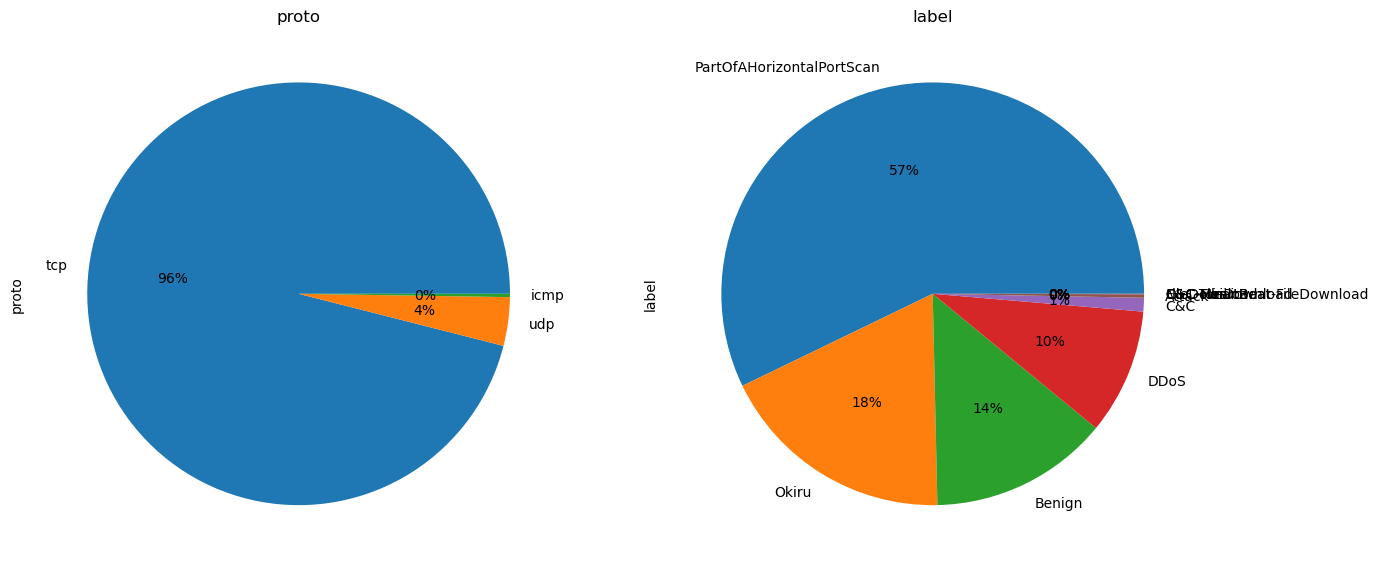

In [45]:
pie_plot(df, ['proto', 'label'], 1, 2)

In [46]:
# build a graph legend function
def build_legend(values, labels):
    total = sum(values)
    legend_entries = []
    for i in range(len(values)):
        percentage = round(100 * values[i] / total, 1)
        entry = labels[i] + ' (' + str(percentage) + '%)'
        legend_entries.append(entry)
    return legend_entries

# helper function for drawing mulitple charts.
def bake_pies(data_list, labels, t):
    list_length = len(data_list)
    
    # set up color palettes
    color_lists = [sns.color_palette('bright'), sns.color_palette('pastel'), sns.color_palette('dark')]
    color_cycles = [itertools.cycle(colors) for colors in color_lists]
    cdicts = [{} for _ in range(list_length)]
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length, figsize=(25, 10), tight_layout=False)
    plt.subplots_adjust(wspace=0.7)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdicts[count]:
                cdicts[count][value] = next(color_cycles[count])
                
        # sort the data by values and take top 10
        data_set = data_set.sort_values(ascending=False)[:10]
       
        # build the wedges
        wedges, texts, autotexts = axs[count].pie(data_set,
                                                  colors=[cdicts[count][v] for v in data_set.index],
                                                  wedgeprops=dict(width=0.5, edgecolor='w'),
                                                  autopct='%1.1f%%',
                                                  textprops=dict(color="black", fontweight="bold", fontsize=6))

        
        # build the legend entries
        legend_entries = build_legend(data_set, data_set.index)
        
        # build the legend
        axs[count].legend(wedges, legend_entries,
                           title=t,
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        
        # set the title
        axs[count].set_title(labels[count])
    
    return axs


In [47]:
df['proto'].value_counts()

tcp     1387401
udp       53622
icmp       3651
Name: proto, dtype: int64

In [48]:
attack_vs_protocol = pd.crosstab(df.label, df.proto)
attack_vs_protocol

proto,icmp,tcp,udp
label,,,
Attack,0,3915,0
Benign,3651,140561,53597
C&C,0,15100,0
C&C-FileDownload,0,43,0
C&C-HeartBeat,0,349,0
C&C-HeartBeat-FileDownload,0,8,0
C&C-Mirai,0,1,0
C&C-Torii,0,30,0
DDoS,0,138755,22


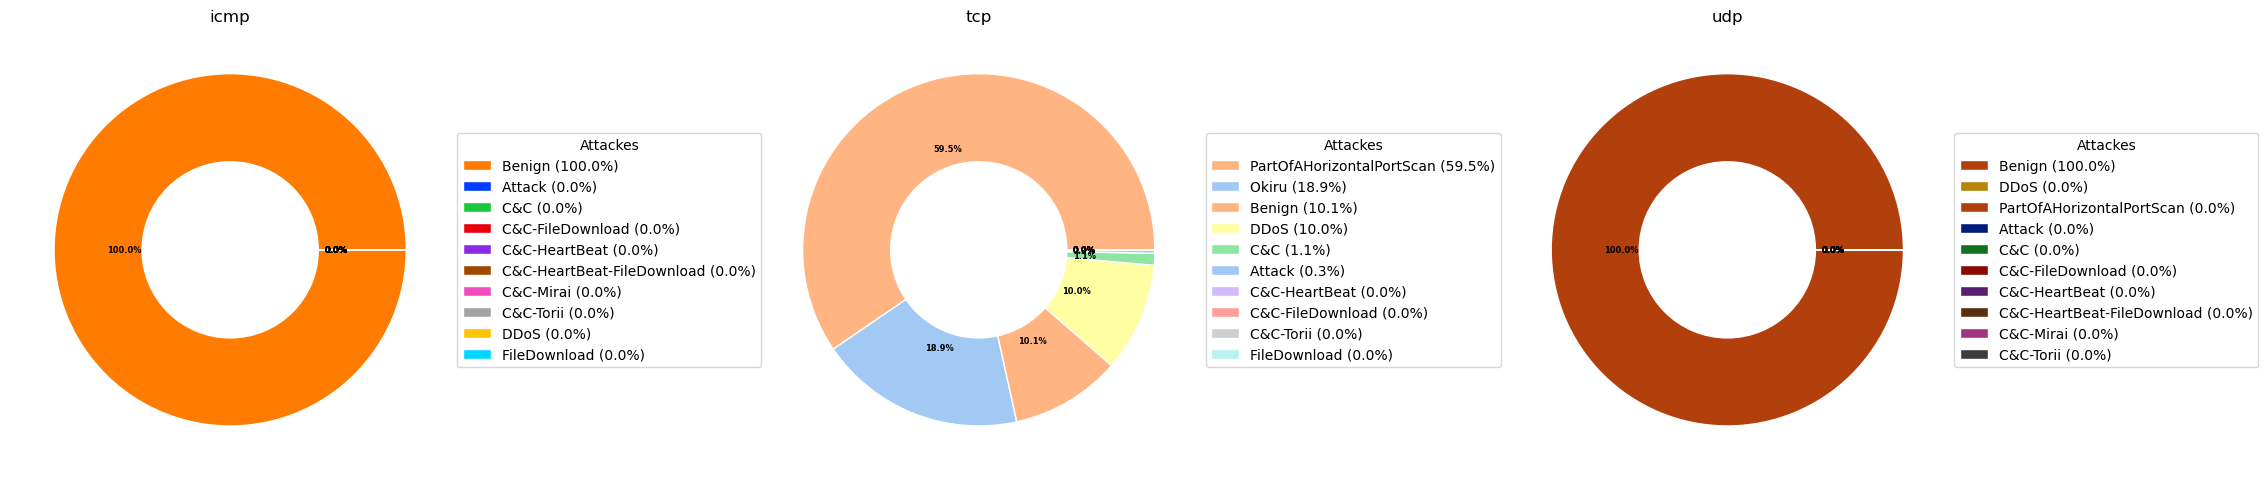

In [49]:
# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'],'Attackes')
plt.show()

In [50]:
# map normal to 0, all attacks to 1
is_attack = df.label.map(lambda a: 0 if a == 'Benign' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack

# view the result
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,attack_flag
0,tcp,Other,2.998796,0,0,S0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,1
1,tcp,Other,0,0,0,S0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,1
2,tcp,Other,0,0,0,S0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,1
3,tcp,Other,2.998804,0,0,S0,0.0,3.0,180.0,0.0,0.0,Benign,0
4,tcp,Other,0,0,0,S0,0.0,1.0,60.0,0.0,0.0,Benign,0


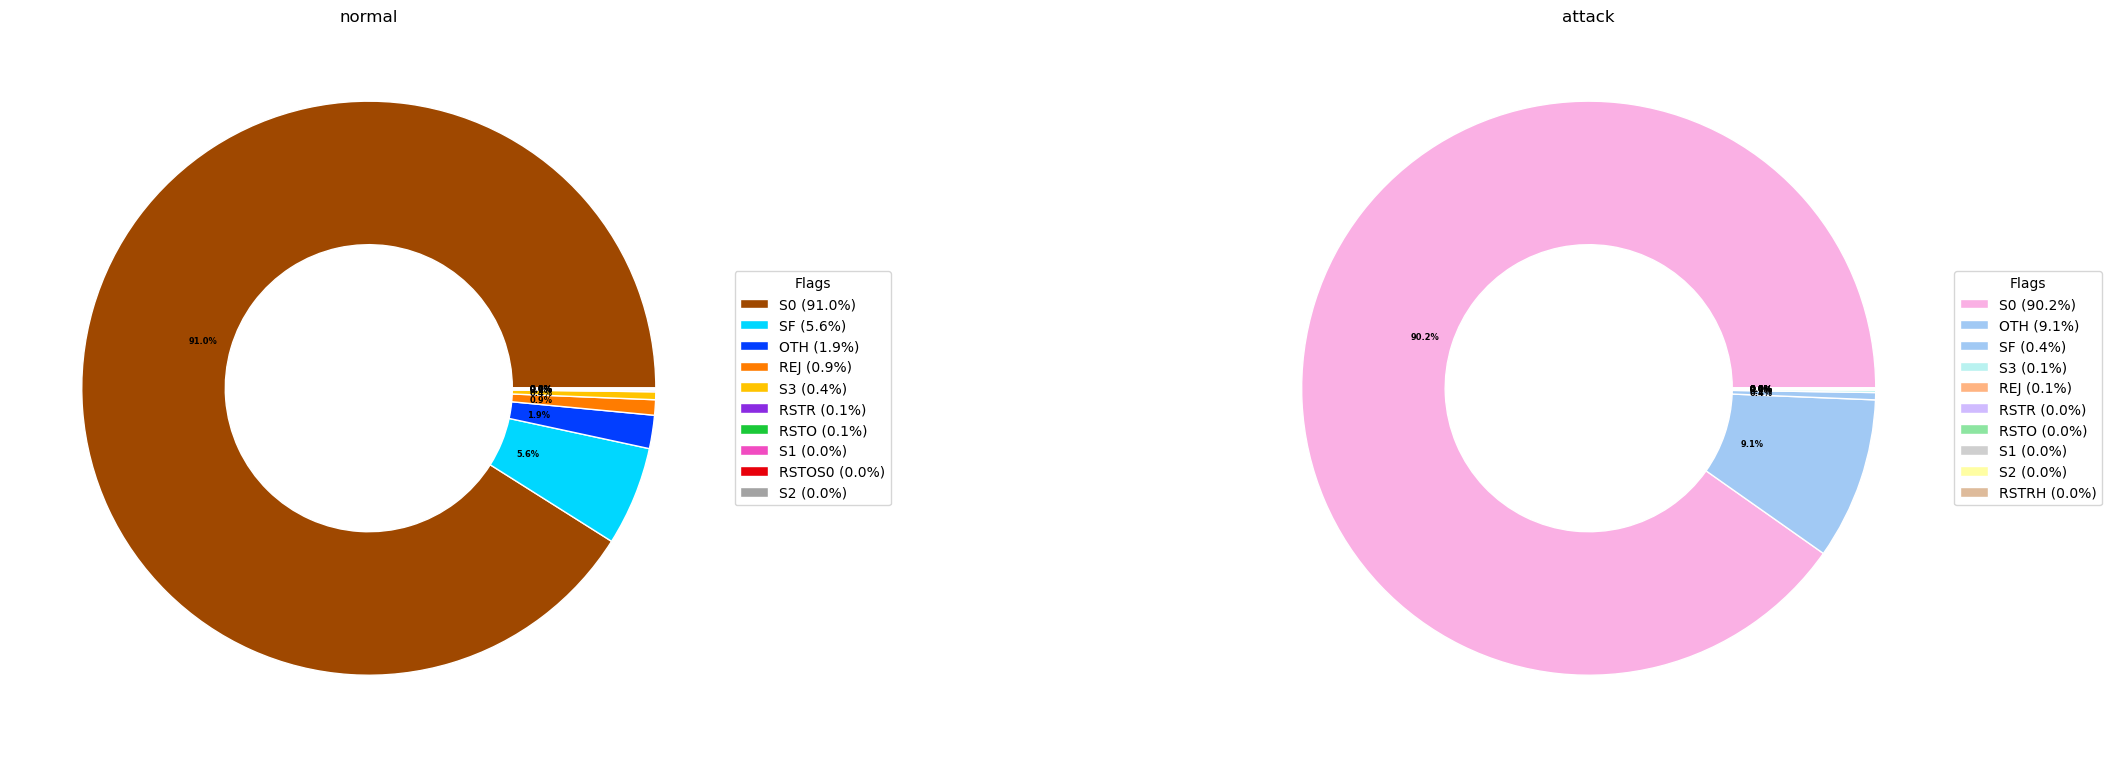

In [51]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].conn_state.value_counts()
attack_flags = df.loc[df.attack_flag == 1].conn_state.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'],'Flags')        
plt.show()

In [52]:
df.service.value_counts()

Other    1434039
dns         4667
ssh         3794
irc         1652
http         506
dhcp           8
ssl            8
Name: service, dtype: int64

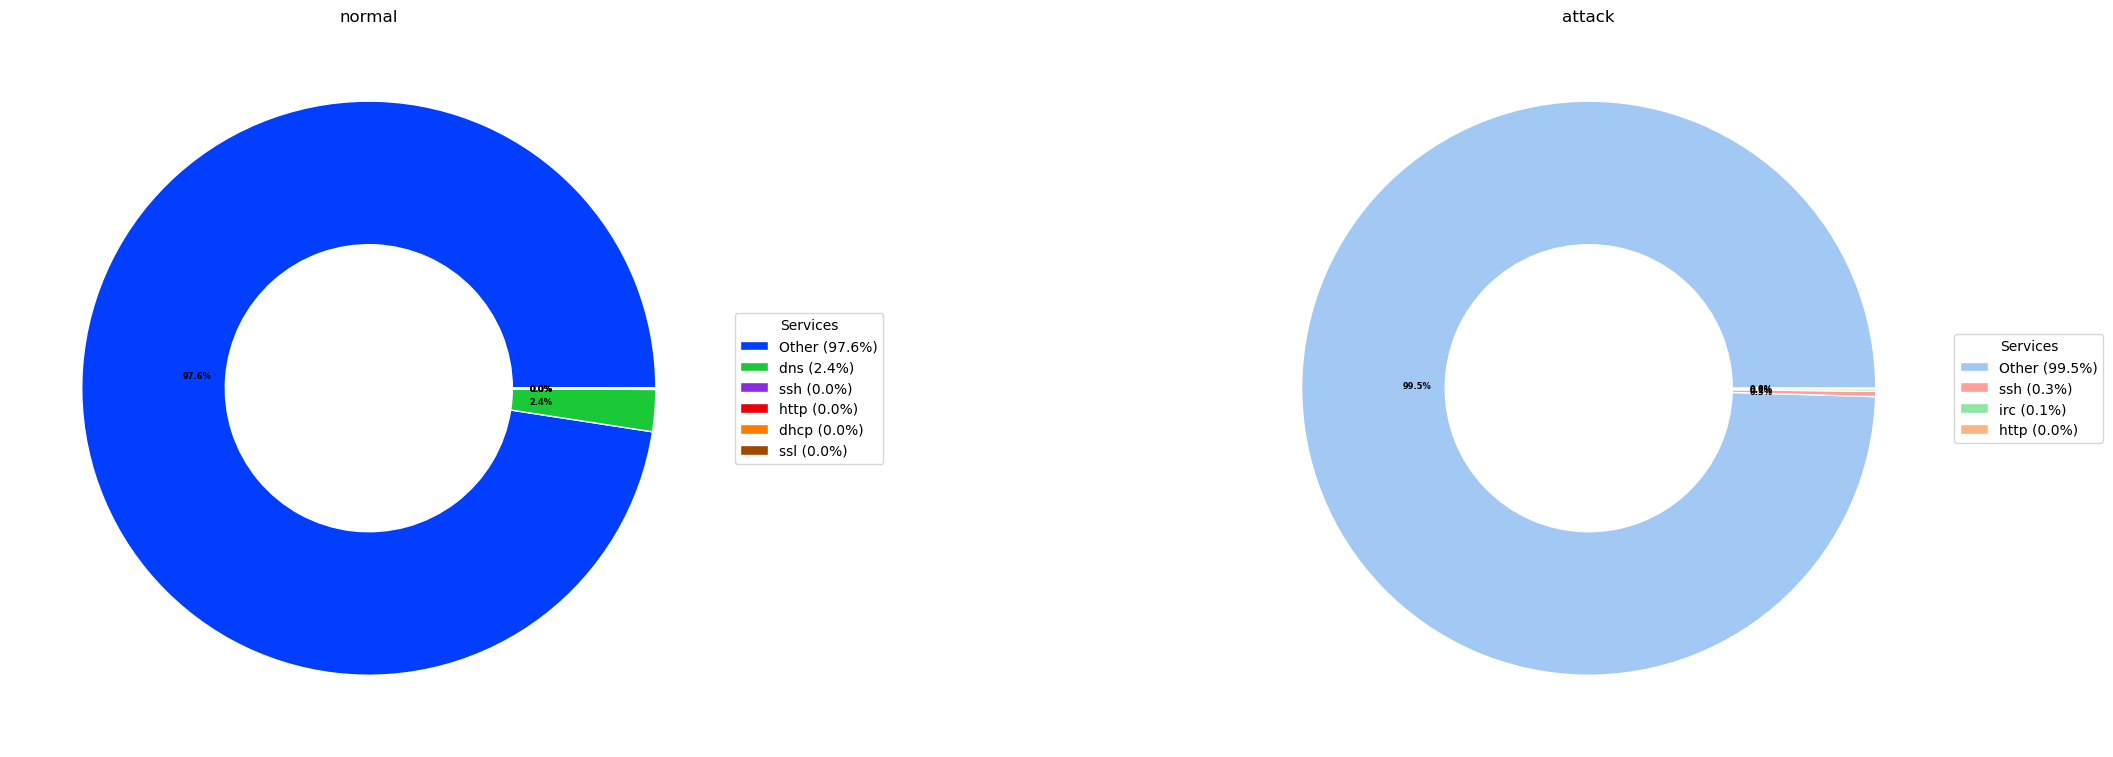

In [53]:
# get a series with the count of each service for attack and normal traffic
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'],'Services')        
plt.show()

In [ ]:
#End